<a href="https://colab.research.google.com/github/PCR-git/Repo1/blob/master/Controls/Discrete_Time_Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MAE 271A - Final Project
## Discrete-Time Kalman Filter
### Peter Racioppo

### Introduction:

##### Consider a vehicle accelerating in one dimension in an inertial frame. Assume that the acceleration is a harmonic of the form: 𝑎(𝑡) = 10∗sin(Ω𝑡) m/sec^2, where Ω = 0.1 rad/sec. Suppose that the acceleration is measured by an accelerometer with a sample rate of 50 Hz at sample times tj. The accelerometer is modeled with with additive white Gaussian noise 𝜔 with zero mean and variance W = 0.0001 (m/sec^2)^2. The accelerometer has a bias b with a priori statistics b ~ N(0,0.01 (m/sec^2)^2). The accelerometer ac is modeled as ac(tj) = a(tj)+b+𝜔(tj). A GPS receiver is used to measure position and velocity in an inertial space. The measurements, which are available at a 2 Hz rate (synchronized with the accelerometer), are zp(ti) = p(ti)+ηp(ti), zv(ti) = v(ti)+ηv(ti), where p(ti) is the position and v(ti) is the velocity at the measurement time ti. Their a priori statistics are x0 ~ N(0 m, (10 m)^2) and v0 ~ N(100 m/s, (1 m/s)^2). The additive measurement noises are assumed to be white noise sequences and independent of each other, with statistics [ηp(ti), ηv(ti)].T ~ N([0,0].T, [[1 m^2, 0], [0, (4 cm/s)^2]]).

##### The truth model that is used as the simulation model is a(t) = a*sin(ωt), where a and ω are given above. By integrating the sine term we get the actual velocity v and position p as:
##### v(t) = v(0) + a/ω − (a/ω)*cos(ωt)
##### p(t) = p(0) + (v(0) + (a/ω))*t − (a/ω^2)*sin(ωt),           (Eq 1)
##### where the statistics for the initial values of velocity v and position p are v(0) ∼ N(v0b, M0v) and p(0) ∼ N(p0b, M0p), respectively, with values of the mean and variance as given above.

### The Accelerometer Model:

##### From the above, the accelerometer model is:
##### ac(tj) = a(tj) + b + w(tj)                                              (Eq 2)
##### where t_(j+1) − t_j = ∆t = 0.02 sec. The accelerometer integrates by an Euler formula as:
##### vc(t_(j+1)) = vc(t_j) + ac_(t_j)*∆t,
##### pc(t_(j+1)) = pc(t_j) + vc(t_j)*∆t + ac(t_j)*∆t^2/2,                   (Eq 3)
##### with initial conditions vc(0) = v0b, pc(0) = p0b = 0.

### The Dynamic Model:

##### The objective is to make the system model for the Kalman filter independent of the actual acceleration a(t).
##### We make the assumption that the actual or true acceleration is integrated by the same Euler integration formulaas the accelerometer, i.e.
##### vE(t_(j+1)) = vE(t_j) + a(t_j)*∆t,
##### pE(t_(j+1)) = pE(t_j) + vE(t_j)(∆t + a(t_j)*∆t^2/2,                                                              (4)
##### with initial statistics v(0) = vE(0) ∼ N(v0b, M0v) and p(0) = pE(0) ∼ N(p0b, M0p).
##### To obtain the dynamics for the Kalman filter, subtract (3) from (4) using (2) to obtain the dynamic equations whose coefficients are independent of the acceleration as:
##### [δpE(t_(j+1)), δvE(t_(j+1)), b(t_(j+1))].T = [[1, ∆t, -∆t^2],[0, 1, -∆t],[0, 0, 1]]*[δpE(t_j), δvE(t_j), b(t_j)].T - [∆t^2/2, ∆t, 0].T * w(t_j), where:
##### δpE(t0) = pE(t0) − pc(t0) ∼ N(0, M0p),
##### δvE(t0) = vE(t0) − vc(t0) ∼ N(0, M0v),
##### E[w(t_j)] = 0,   E(w(t_j)*w(t_l).T) = W*δ_(j,l),    b(0) ∼ N(0, M0b).
##### The dynamic model coefficients are independent of the acceleration profile.

### Measurement Equations:

##### The measurements are corrupted values of p(ti) and v(ti) as:
##### zp(t_i) = p(t_i) + ηp(t_i),
##### zv(t_i) = v(t_i) + ηv(t_i),
##### where p(t_i) is the position and v(t_i) is the velocity at the measurement time t_i = t_(i−1) +40*∆t and the statistics of ηp(ti) and ηv(ti) are given above. To put the measurement equations in a convenient form to construct the Kalman filter, subtract the computed accelerometer position and velocity from the GPS measurements as:
##### δzp(t_i) = δp(t_i) + ηp(t_i),
##### δzv(t_i) = δv(t_i) + ηv(t_i),
##### where δp(ti) = p(t_i) − pc(t_i) and δv(t_i) = v(t_i) − vc(t_i).
##### Note that the GPS measures corrupted values of the actual position and velocity.

### Kalman Filtering:

##### Assume that the approximation can be made that δp(t_i) = δpE(t_i) and δv(t_i) = δvE(t_i). Based on the measurement equations and the dynamics, the approximate posteriori conditional mean δx(t_i) and the conditional posteriori error variance P(t_i) are computed in the Kalman filter algorithm where we define:
##### δx_hat(t_i) = [δp_hat(t_i), δv_hat(t_i), b_hat(t_i)].T = [p_hat(t_i) - pc(t_i), v_hat(t_i) - vc(t_i), b_hat(t_i)].T
##### Note that the state estimate is considered to be the estimate of the actual position and velocity, which is what the measurement uses.

### The System in Standard Form:

##### δx_(k+1) = Φk*xk + Γk*wk,
##### δz_k = Hk*xk + vk, where:
##### Φk = [[1, ∆t, -∆t^2],[0, 1, -∆t],[0, 0, 1]]
##### Γ = [∆t^2,∆t,0].T
##### H = [[1,0,0],[0,1,0]]
##### V = [[1 0],[0 (4*10^-2)^2]]
##### W = 0.0001
##### M0 = [[Mp0,0,0],[0,Mv0,0],[0,0,Mb0]]

### The Kalman Filter Algorithm:

##### Kk = Mk*Hk.T*(Hk*Mk*Hk.T + Vk)^-1 # Kalman Gain
##### Pk = (I-Kk*Hk)*Mk*(I-Kk*Hk).T + Kk*Vk*Kk.T # A Posteri Covariance
##### M_(k+1) = Φk*Pk*Φk.T + Γk*Wk*Γk.T
##### δxb_(k+1) = Φk*δxhat_k
##### δxhat_k = δxb_k + Kk*(Zk-Hk*δxb_k)

### Initializations:

In [0]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# System Parameters:

# Oscillator properties:
omega = 0.1 # Angular velocity (rad/sec)
a = 10 # Magnitude of the oscillation

# Accelerometer properties:
fc = 50 # Accelerometer sample rate (Hz)
tk = 1/fc # Sample time-step
w_mu = 0 # Mean of additive Gaussian white noise
W = 0.0001 # Variance of additive Gaussian white noise
b_mu = 0 # Mean of accelerometer bias
b_var = 0.01 # Variance of accelerometer bias
b = np.random.normal(b_mu,np.sqrt(b_var)) # Accelerometer bias

# GPS Properties:
f_GPS = 2 # GPS sample rate (Hz)

# Additive measurement noise statistics:
etap_mu = 0 # Mean position measurement noise
etav_mu = 0 # Mean velocity measurement noise
etap_var = 1 # Variance of position measurement noise
etav_var = 0.04**2 # Variance of velocity measurement noise

In [0]:
# Time info:
t0 = 0 # Start time
tf = 30 # End time
steps = int(tf/tk) # Number of time steps
tvec = np.linspace(t0,tf,steps) # Time vector

# Initial conditions:
p0_mu = 0 # Mean initial position
v0_mu = 100 # Mean initial velocity
p0_var = 10**2 # Initial position variance
v0_var = 1 # Initial velocity variance
p0 = np.random.normal(p0_mu,np.sqrt(p0_var)) # Initial position
v0 = np.random.normal(v0_mu,np.sqrt(v0_var)) # Initial velocity

# Accelerometer initial conditions:
pc_k = 0 # Initial position
vc_k = 0 # Initial velocity

In [0]:
# Dynamic equation matrices:
Phi = np.matrix([[1,tk,-(tk**2)/2],[0,1,-tk],[0,0,1]]) # State Matrix
Gamma = -np.matrix([tk**2/2,tk,0]).T # Input Matrix
H = np.matrix([[1,0,0],[0,1,0]]) # State-to-output matrix

# Kalman Filter Initializations:
V = np.matrix([[etap_var,0],[0, etav_var]]) # Measurement noise covariance matrix
x_bar_k = np.matrix([p0_mu,v0_mu,b]).T # State vector mean
dx_bar_k = np.matrix([0,0,b]).T # State vector mean
# ratio = fc/f_GPS # Ratio of the two sample frequencies
Mk = np.matrix([[100,0,0],[0,1,0],[0,0,0.01]]) # Initial step covariance
I = np.identity(3) # Identity matrix

### Dynamic Simulation:

In [0]:
# Dynamic simulation via Euler integration:
def f_DynamicSim(steps,pc_k,vc_k,a,omega,tvec,v0,p0,w_mu,W,b,tk,etap_mu,etap_var,etav_mu,etav_var):
    
    # Intialize vectors:
    p_vec  = np.zeros(steps)
    v_vec  = np.zeros(steps)
    a_vec  = np.zeros(steps)
    pc_vec = np.zeros(steps)
    vc_vec = np.zeros(steps)
    ac_vec = np.zeros(steps)
    zp_vec = np.zeros(steps)
    zv_vec = np.zeros(steps)
    dx_vec = np.zeros((3,steps))
    
    for k in np.arange(steps):
        # Concatenating values to vectors:
        pc_vec[k] = pc_k
        vc_vec[k] = vc_k

        # Kinematic equations:
        a_k = a*np.sin(omega*tvec[k])
        v_k = v0 + (a/omega)*(1-np.cos(omega*tvec[k]))
        p_k = p0 + (v0+a/omega)*tvec[k] - (a/omega**2)*np.sin(omega*tvec[k])

        # Accelerometer measurements:
        w = np.random.normal(w_mu,np.sqrt(W)) # Additive noise at time t_k
        ac_k = a_k + b + w # Accelerometer measurement

        # Accelerometer kinematics:
        # pc(t_(k+1)) = pc(t_k) + vc(t_k)*∆t + ac(t_k)*∆t^2/2,
        # vc(t_(k+1)) = vc(t_k) + ac_(t_k)*∆t,
        pc_k = pc_k + vc_k*tk + (ac_k/2)*(tk**2)
        vc_k = vc_k + ac_k*tk

        # Additive measurement noise in the GPS measurements:
        etap_k = np.random.normal(etap_mu,np.sqrt(etap_var))
        etav_k = np.random.normal(etav_mu,np.sqrt(etav_var))

        # GPS measurements:
        zp_k = p_k + etap_k
        zv_k = v_k + etav_k
        
        # Adding values to vectors:
        p_vec[k] = p_k
        v_vec[k] = v_k
        a_vec[k] = a_k
        
        pc_vec[k] = pc_k
        vc_vec[k] = vc_k
        ac_vec[k] = ac_k
        
        zp_vec[k] = zp_k
        zv_vec[k] = zv_k
        
        dx_k = np.array([p_k - pc_k, v_k - vc_k, b]).T
        dx_vec[:,k] = dx_k # State vector
    
    z = np.matrix([zp_vec,zv_vec]).T
    dzp_vec = zp_vec - pc_vec
    dzv_vec = zv_vec - vc_vec
    dz = np.matrix([dzp_vec,dzv_vec])
    
    return(p_vec,v_vec,a_vec,pc_vec,vc_vec,ac_vec,zp_vec,zv_vec,z,dz,dx_vec)

In [0]:
## Running the Dynamic Simulation:
[p_vec,v_vec,a_vec,pc_vec,vc_vec,ac_vec,zp_vec,zv_vec,z,dz,dx_vec] = f_DynamicSim(steps,pc_k,vc_k,a,omega,tvec,v0,p0,w_mu,W,b,tk,etap_mu,etap_var,etav_mu,etav_var)

### Discrete Time Kalman Filter:

In [0]:
# Discrete-Time Kalman Filter:
def f_KalmanFilter(Phi,Gamma,H,dz,V,dx_bar_k,tk,f_GPS,Mk,I,zp_vec,zv_vec):
    dx_hat_vec = np.zeros((3,steps)) # Initialize vector of state vectors
    Pk_vec = np.zeros((3,3,steps))
       
    # ----------------
    K0 = np.matmul(np.matmul(Mk,H.T),np.linalg.inv(np.matmul(np.matmul(H,Mk),H.T) + V))
    IKH0 = I - np.matmul(K0,H)
    P0 = np.matmul(IKH0,np.matmul(Mk,IKH0.T)) + np.matmul(K0,np.matmul(V,K0.T))
    M1 = np.matmul(Phi,np.matmul(P0,Phi.T)) + np.matmul(Gamma,W*Gamma.T)
    K1 = np.matmul(np.matmul(M1,H.T),np.linalg.inv(np.matmul(np.matmul(H,M1),H.T) + V))
    IKH1 = I - np.matmul(K1,H)
    P1 = np.matmul(IKH1,np.matmul(M1,IKH1.T)) + np.matmul(K1,np.matmul(V,K1.T))
    Mk = np.matmul(Phi,np.matmul(P1,Phi.T)) + np.matmul(Gamma,W*Gamma.T)
    x_zero = np.matrix([100,1000,10]).T
    dx_hat_k = x_zero
    dx_bar_k = np.matmul(Phi,x_zero)
    dx_hat_k = dx_bar_k + np.matmul(K1,(dz[:,0]) - np.matmul(H,dx_bar_k))
    Kk = K1
    
    Hk = H
                                  
    for k in np.arange(steps-2)+2:
#         # if np.mod(k+(ratio-1),ratio) == 0:
#         if np.mod(tk*k*f_GPS,1) == 0:
#             # When both the accelerometer and GPS are taking samples,
#             # this data can be used in the Kalman filter.
#             Hk = H
#         else:
#             # When only the accelerometer is taking samples,
#             # the Kalman filter must make estimations without new measurements.
#             Hk = 0*H
            
        # Kk = Mk*Hk.T*(Hk*Mk*Hk.T + Vk)^-1
        Kk = np.matmul(np.matmul(Mk,Hk.T),np.linalg.inv(np.matmul(np.matmul(Hk,Mk),Hk.T) + V))
        # Pk = (I-Kk*Hk)*Mk*(I-Kk*Hk).T + Kk*Vk*Kk.T
        IKkHk = I - np.matmul(Kk,Hk)
        Pk = np.matmul(IKkHk,np.matmul(Mk,IKkHk.T)) + np.matmul(Kk,np.matmul(V,Kk.T))
        
        dx_bar_k = np.matmul(Phi,dx_hat_k)
        dx_hat_k = dx_bar_k + np.matmul(Kk,(dz[:,k] - np.matmul(Hk,dx_bar_k)))
                                   
#         # δxhat_k = δxb_k + Kk*(Zk-Hk*δxb_k)
#         dx_hat_k = dx_bar_k + np.matmul(Kk,(dz[:,k] - np.matmul(Hk,dx_bar_k))) # Estimated state
        dx_hat_vec[:,k] = np.array(dx_hat_k.T)[0] # Concatenate state vector at time t_k
#         # δxb_(k+1) = Φk*δxhat_k
#         dx_bar_k = np.matmul(Phi,dx_hat_k)
                                  
        # M_(k+1) = Φk*Pk*Φk.T + Γk*Wk*Γk.T
        Mk = np.matmul(Phi,np.matmul(Pk,Phi.T)) + np.matmul(Gamma,W*Gamma.T)

    dp_hat_vec = dx_hat_vec[0] # Vector of estimated dp's
    dv_hat_vec = dx_hat_vec[1] # Vector of estimated dv's
    b_hat_vec = dx_hat_vec[2] # Vector of estimated b's
    p_hat_vec = dp_hat_vec + zp_vec # Vector of estimated p's
    v_hat_vec = dv_hat_vec + zv_vec # Vector of estimated v's
    Pk_vec[:,:,k] = Pk  
    
    return(dx_hat_vec,dp_hat_vec,dv_hat_vec,b_hat_vec,p_hat_vec,v_hat_vec,Pk_vec)

In [0]:
# Running the Kalman Filter:
[dx_hat_vec,dp_hat_vec,dv_hat_vec,b_hat_vec,p_hat_vec,v_hat_vec,Pk_vec] = f_KalmanFilter(Phi,Gamma,H,dz,V,dx_bar_k,tk,f_GPS,Mk,I,pc_vec,vc_vec)

# Pulling components out of vectors
dp_vec = dx_vec[0,:] # Vector of dp's
dv_vec = dx_vec[1,:] # Vector of dv's
dp_hat_vec = dx_hat_vec[0,:] # Vector of estimated dp's
dv_hat_vec = dx_hat_vec[1,:] # Vector of estimated dv's
b_hat_vec = dx_hat_vec[2,:] # Vector of estimated b's

p_hat_vec = dp_hat_vec + pc_vec # Vector of estimated p's
v_hat_vec = dv_hat_vec + vc_vec # Vector of estimated v's

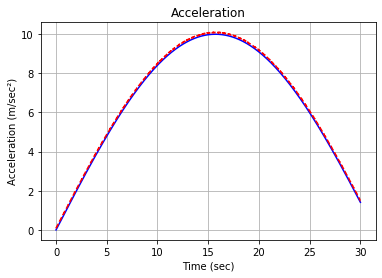

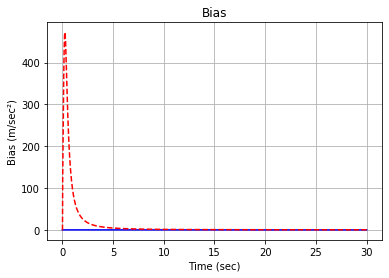

In [0]:
plt.plot(tvec,a_vec,'b')
plt.plot(tvec,ac_vec,'r--')
plt.title("Acceleration") # Plot title
plt.xlabel("Time (sec)") # x-axis label
plt.ylabel("Acceleration (m/sec\u00b2)") # y-axis label
plt.grid()
plt.show()

plt.plot(tvec,b*np.ones((steps)),'b')
plt.plot(tvec,b_hat_vec,'r--')
plt.title("Bias") # Plot title
plt.xlabel("Time (sec)") # x-axis label
plt.ylabel("Bias (m/sec\u00b2)") # y-axis label
plt.grid()
plt.show()

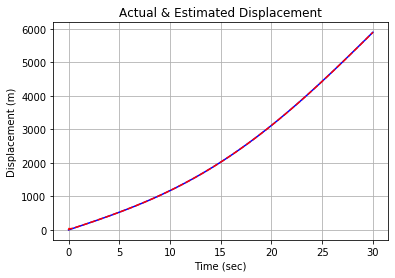

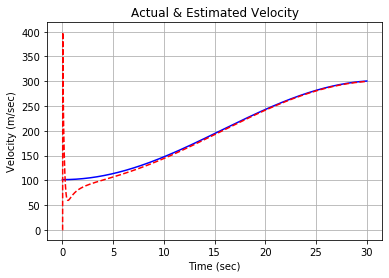

In [0]:
plt.plot(tvec,p_vec,'b')
plt.plot(tvec,p_hat_vec,'r--')
plt.title("Actual & Estimated Displacement") # Plot title
plt.xlabel("Time (sec)") # x-axis label
plt.ylabel("Displacement (m)"); # y-axis label
plt.grid()
plt.show()

plt.plot(tvec,v_vec,'b')
plt.plot(tvec,v_hat_vec,'r--')
plt.title("Actual & Estimated Velocity") # Plot title
plt.xlabel("Time (sec)") # x-axis label
plt.ylabel("Velocity (m/sec)"); # y-axis label
plt.grid()
plt.show()

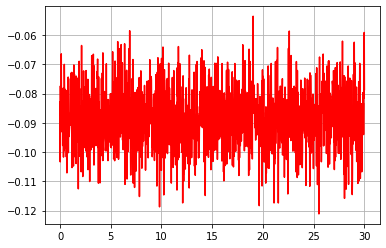

In [0]:
# Acceleration Error
plt.plot(tvec,a_vec-ac_vec,'r')
plt.grid()

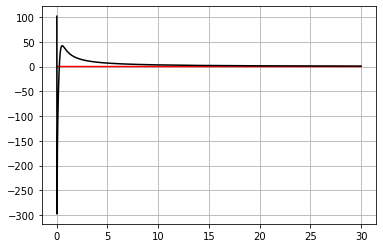

In [0]:
# Velocity Error
# plt.plot(tvec,v_vec-vc_vec,'b')
plt.plot(tvec[1:],(v_vec-zv_vec)[1:],'r')
plt.plot(tvec[1:],(v_vec-v_hat_vec)[1:],'k')
plt.grid()
plt.show()

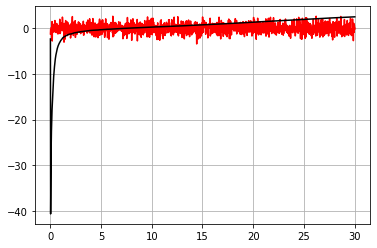

In [0]:
# Position Error
# plt.plot(tvec,p_vec-pc_vec,'b')
plt.plot(tvec[1:],(p_vec-zp_vec)[1:],'r')
plt.plot(tvec[1:],(p_vec-p_hat_vec)[1:],'k')
plt.grid()
plt.show()

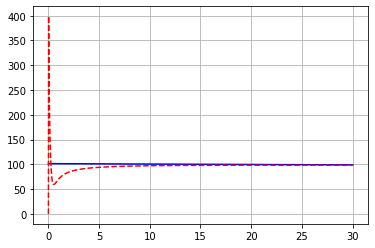

In [0]:
# Estimated velocity differences
plt.plot(tvec[1:],dv_vec[1:],'b')
plt.plot(tvec[1:],dv_hat_vec[1:],'r--')
plt.grid()
plt.show()

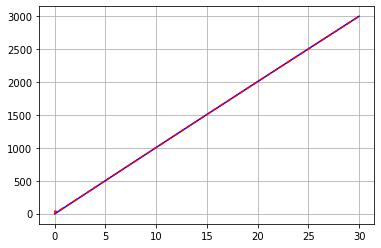

In [0]:
# Estimated position differences
plt.plot(tvec,dp_vec,'b')
plt.plot(tvec,dp_hat_vec,'r--')
plt.grid()
plt.show()

### Generation of Checks to Validate the Kalman Filter Performance:

##### We first show that the actual error variance obtained directly from a Monte Carlo simulation is close to the error variance P(t_i) computed to form the Kalman gain. The Monte Carlo simulation computes an ensemble of realizations of the state δx(t_j) and state estimates δx(t_i). Define δx(t_j) as
##### δx(t_j) = [δp(t_j), δv(t_j), b(t_j)].T = [p(t_j)-pc(t_j), v(t_j)-vc(t_j), b(t_j)].T,
#### where p(t_j), v(t_j), and b(t_j) are from the truth model. The actual a priori estimation error is defined as
##### e_bar(t_j) = δx(t_j) - δx_bar(tj) = [p(t_j)-pc(t_j), v(t_j)-vc(t_j), b(t_j)].T - [p_bar(t_j)-pc(t_j), v_bar(t_j)-vc(t_j), b_bar(t_j)].T
##### = [p(t_j)-p_bar(t_j), v(t_j)-v_bar(t_j), b(t_j)-b_bar(t_j)].T,
##### where a bar denotes the a priori estimate or estimation error propagated in the Kalman filter. However, at the measurement time t_i = t_j, e_bar(t_i) = δx(t_i) − δx_bar(t_i−) and the posteriori estimation error e(t_i) = δx(t_i) − δx_hat(t_i+), where t_i− means before the measurement update and t_i+ means after the measurement update.

##### A Monte Carlo simulation is to be constructed to find the ensemble averages over a set of realizations. Let el(t_i) represent the actual error for realization l. To obtain this realization, an initial condition for p(0), v(0), b  are generated from a Gaussian noise generator. The state estimate is determined from measurements where the measurement noise for ηp(t_i) and ηp(t_i) are generated at each measurement time t_i from a Gaussian noise generator. The process noise w(t_j) in the accelerometer model is generated at each propagation time t_j.

##### The ensemble average of el(t_i) which produces the actual mean is e_ave(t_i) = (1/N_ave)*sum(el(t_i)), where N_ave, the number of realizations, should be large enough to produce good approximate statistics. It is expected that e_ave(t_i) ≈ 0 for all t_i ∈ [t0, tf].

##### Next, consider the ensemble average producing the actual error variance P_ave as
##### P_ave(t_i) = (1/(N_ave-1))*sum([el(t_i) − e_ave(t_i)]*[el(t_i) − e_ave(t_i)].T),
##### where N_ave − 1 is used for an unbiased variance from small sample theory. The matrix P_ave(t_i) should be close to P(t_i) computed in the Kalman filter algorithm, i.e. P_ave(t_i) − P (t_i) ≈ 0 for all t_i. This is an important check to verify that the modeling is approximately correct and the Kalman filter has been programmed correctly.

##### Similarly, the orthogonality of the error in estimates with the estimate is checked by the average (1/N_ave)*sum([el(t_i)−e_ave(t)i)]*x_hat(t_i).T) ≈ 0 ∀ t_i.

##### Finally, the independence of the residuals are to be checked. The residual for a realization l is
##### rl(t_i) = [δz_pl(t_i) − δz_bar_pl(t_i), δz_vl(t_i) − δz_bar_vl(t_i)].T.
##### Then, the ensemble average for the correlation of the residuals is
##### (1/N_ave)*sum(rl(t_i)*rl(t_m).T) ≈ 0 ∀ tm < ti.

In [0]:
# Monte Carlo Simulation
def f_MonteCarlo(steps,pc_k,vc_k,a,omega,tvec,v0,p0,w_mu,W,etap_mu,etap_var,etav_mu,etav_var,Phi,Gamma,H,V,dx_bar_k,tk,f_GPS,Mk,I,pc_vec,vc_vec,N_ave,tm,ti,b_mu,b_var):
    
    sum_vec = 0
    dz_summ = 0
    dz_sumi = 0
    el_vec_vec = np.zeros((3,steps,N_ave))
    dx_hat_vec_vec = np.zeros((3,steps,N_ave))
    dz_vec_vec = np.zeros((2,steps,N_ave))
    
    for n in np.arange(N_ave):

        # Initial conditions
        p0 = np.random.normal(p0_mu,np.sqrt(p0_var)) # Initial position
        v0 = np.random.normal(v0_mu,np.sqrt(v0_var)) # Initial velocity
        dz_vec = np.zeros((2,steps))
        
        # Accelerometer initial conditions
        pc_k = p0_mu # Initial position
        vc_k = v0_mu # Initial velocity
        
        b_n = np.random.normal(b_mu,np.sqrt(b_var)) # Accelerometer bias
        x_bar_k = np.matrix([p0_mu,v0_mu,b_mu]).T # State vector mean
        dx_bar_k = np.matrix([p0-p0_mu,v0-v0_mu,b_n-b_mu]).T # State vector mean

        # Initializing vector of state vectors
        el_vec = np.zeros((3,steps))
        
        [p_vec,v_vec,a_vec,pc_vec,vc_vec,ac_vec,zp_vec,zv_vec,z,dz,dx_vec] = f_DynamicSim(steps,pc_k,vc_k,a,omega,tvec,v0,p0,w_mu,W,b_n,tk,etap_mu,etap_var,etav_mu,etav_var)
        [dx_hat_vec,dp_hat_vec,dv_hat_vec,b_hat_vec,p_hat_vec,v_hat_vec,Pk_vec] = f_KalmanFilter(Phi,Gamma,H,dz,V,dx_bar_k,tk,f_GPS,Mk,I,pc_vec,vc_vec)

        el_vec = dx_vec - dx_hat_vec # Error for time t_k
        
        el_vec_vec[:,:,n] = el_vec
        dx_hat_vec_vec[:,:,n] = dx_hat_vec
        dz_vec_vec[:,:,n] = dz_vec
        sum_vec = sum_vec + el_vec
        dz_summ = dz_summ + dz_vec[:,tm]
        dz_sumi = dz_sumi + dz_vec[:,ti]

    e_ave_vec = sum_vec/N_ave
    dz_avem = dz_summ/N_ave
    dz_avei = dz_sumi/N_ave
    
    return(el_vec_vec,dx_hat_vec_vec,dz_vec_vec,e_ave_vec,dz_avem,dz_avei)

In [0]:
N_ave = 10
# tm = 5 # Random integer from [0 30]
# ti = 25 # Random integer from [0 30], ti /= tm
rand = np.random.choice(30, 2) # Random choice from np.arange(30) of size 2, without replacement
tm = rand[0] # Random integer from [0 30]
ti = rand[1] # Random integer from [0 30], ti /= tm

# Run Monte Carlo simulation:
[el_vec_vec,dx_hat_vec_vec,dz_vec_vec,e_ave_vec,dz_avem,dz_avei] = f_MonteCarlo(steps,pc_k,vc_k,a,omega,tvec,v0,p0,w_mu,W,etap_mu,etap_var,etav_mu,etav_var,Phi,Gamma,H,V,dx_bar_k,tk,f_GPS,Mk,I,pc_vec,vc_vec,N_ave,tm,ti,b_mu,b_var)

In [0]:
# Pulling components out of vectors
e_ave_p = e_ave_vec[0,:]
e_ave_v = e_ave_vec[1,:]
e_ave_b = e_ave_vec[2,:]

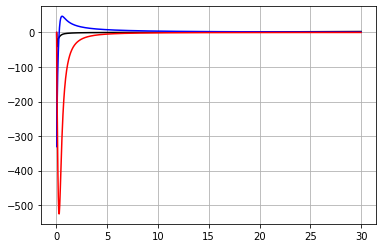

In [0]:
# Monte Carlo errors
plt.plot(tvec[1:],e_ave_p[1:],'k-')
plt.plot(tvec[1:],e_ave_v[1:],'b-')
plt.plot(tvec[1:],e_ave_b[1:],'r-')
plt.grid()
plt.show()

In [0]:
# Difference of P matrices
P_ave_vec = np.zeros((3,3,steps))
Ortho_vec = np.zeros((3,3,steps))
Ones = np.ones((3,steps,N_ave))
Diff1 = el_vec_vec - e_ave_vec[:,:,np.newaxis]*Ones

for k in np.arange(steps):
    Sum1 = 0
    Sum2 = 0
    for n in np.arange(N_ave):
        Summand1 = np.matmul(Diff1[:,k,n],(Diff1[:,k,n]).T)
        Sum1 = Sum1 + Summand1
        Summand2 = np.matmul(Diff1[:,k,n],(dx_hat_vec_vec[:,k,n]).T)
        Sum2 = Sum2 + Summand2
    P_avek = Sum1/(N_ave-1)
    P_ave_vec[:,:,k] = P_avek
    Orthok = Sum2/N_ave
    Ortho_vec[:,:,k] = Orthok
P_diff = P_ave_vec - Pk_vec

In [0]:
# Residuals
Ones = np.ones((2,N_ave))
rm = dz_vec_vec[:,tm,:] - dz_avem[:,np.newaxis]*Ones
ri = dz_vec_vec[:,ti,:] - dz_avei[:,np.newaxis]*Ones
Sum_residuals = 0
for n in np.arange(N_ave):
    ResProd = np.matmul(ri[:,n],rm[:,n].T)
    Sum_residuals = Sum_residuals + ResProd

ResAvg = Sum_residuals/N_ave

In [0]:
#  Plots of the difference of the P matrices
L = max(np.shape(P_diff))
P_diff11 = np.reshape(P_diff[0,0,:],(L))
P_diff12 = np.reshape(P_diff[0,1,:],(L))
P_diff13 = np.reshape(P_diff[0,2,:],(L))
P_diff21 = np.reshape(P_diff[1,0,:],(L))
P_diff22 = np.reshape(P_diff[1,1,:],(L))
P_diff23 = np.reshape(P_diff[1,2,:],(L))
P_diff31 = np.reshape(P_diff[2,0,:],(L))
P_diff32 = np.reshape(P_diff[2,1,:],(L))
P_diff33 = np.reshape(P_diff[2,2,:],(L))

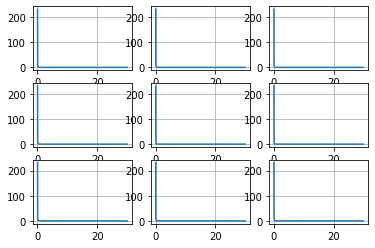

In [0]:
plt.subplot(3,3,1)
plt.plot(tvec[1:],P_diff11[1:])
plt.grid()
plt.subplot(3,3,2)
plt.plot(tvec[1:],P_diff12[1:])
plt.grid()
plt.subplot(3,3,3)
plt.plot(tvec[1:],P_diff13[1:])
plt.grid()
plt.subplot(3,3,4)
plt.plot(tvec[1:],P_diff21[1:])
plt.grid()
plt.subplot(3,3,5)
plt.plot(tvec[1:],P_diff22[1:])
plt.grid()
plt.subplot(3,3,6)
plt.plot(tvec[1:],P_diff23[1:])
plt.grid()
plt.subplot(3,3,7)
plt.plot(tvec[1:],P_diff31[1:])
plt.grid()
plt.subplot(3,3,8)
plt.plot(tvec[1:],P_diff32[1:])
plt.grid()
plt.subplot(3,3,9)
plt.plot(tvec[1:],P_diff33[1:])
plt.grid()
plt.show()

In [0]:
# Orthogonality Plots

L = max(np.shape(Ortho_vec))
Ortho11 = np.reshape(Ortho_vec[0,0,:],(L))
Ortho12 = np.reshape(Ortho_vec[0,1,:],(L))
Ortho13 = np.reshape(Ortho_vec[0,2,:],(L))
Ortho21 = np.reshape(Ortho_vec[1,0,:],(L))
Ortho22 = np.reshape(Ortho_vec[1,1,:],(L))
Ortho23 = np.reshape(Ortho_vec[1,2,:],(L))
Ortho31 = np.reshape(Ortho_vec[2,0,:],(L))
Ortho32 = np.reshape(Ortho_vec[2,1,:],(L))
Ortho33 = np.reshape(Ortho_vec[2,2,:],(L))

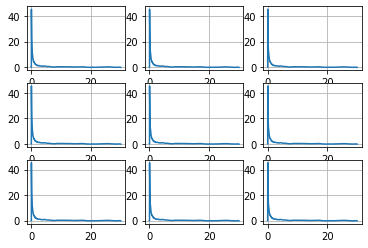

In [0]:
plt.subplot(3,3,1)
plt.plot(tvec,Ortho11)
plt.grid()
plt.subplot(3,3,2)
plt.plot(tvec,Ortho12)
plt.grid()
plt.subplot(3,3,3)
plt.plot(tvec,Ortho13)
plt.grid()
plt.subplot(3,3,4)
plt.plot(tvec,Ortho21)
plt.grid()
plt.subplot(3,3,5)
plt.plot(tvec,Ortho22)
plt.grid()
plt.subplot(3,3,6)
plt.plot(tvec,Ortho23)
plt.grid()
plt.subplot(3,3,7)
plt.plot(tvec,Ortho31)
plt.grid()
plt.subplot(3,3,8)
plt.plot(tvec,Ortho32)
plt.grid()
plt.subplot(3,3,9)
plt.plot(tvec,Ortho33)
plt.grid()
plt.show()